In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings; warnings.filterwarnings('ignore')

In [22]:
#Loading original dataset
booking = pd.read_csv('data_abalone.csv')
df = booking[["Length", "Diameter", "Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings","Sex"]]

In [23]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

In [24]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0


In [25]:
#Loading generated dataset
df2 = pd.read_csv('data_abalone2.csv')
df2['Sex'] = LabelEncoder().fit_transform(df2['Sex'])
df2

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex
0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,13.0,0
1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,17.0,2
2,3.0,1.0,3.0,1.0,0.0,1.0,0.0,17.0,2
3,4.0,1.0,3.0,1.0,0.0,1.0,0.0,51.0,2
4,5.0,1.0,3.0,1.0,0.0,3.0,0.0,51.0,2
...,...,...,...,...,...,...,...,...,...
9995,100.0,100.0,10.0,100.0,100.0,100.0,9.0,5.0,2
9996,100.0,100.0,10.0,100.0,100.0,100.0,9.0,4.0,2
9997,100.0,100.0,10.0,100.0,100.0,100.0,9.0,3.0,2
9998,100.0,100.0,10.0,100.0,100.0,100.0,9.0,2.0,2


In [26]:
#Extracting and analysing through isolation forest
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(df)
df2['is_inlier_IF'] = iso_forest.predict(df2)

In [27]:
inliers_IF = df2[df2['is_inlier_IF'] == 1]
outliers_IF = df2[df2['is_inlier_IF'] == -1]

In [28]:
outliers_IF

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex,is_inlier_IF
0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,13.0,0,-1
1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,17.0,2,-1
2,3.0,1.0,3.0,1.0,0.0,1.0,0.0,17.0,2,-1
3,4.0,1.0,3.0,1.0,0.0,1.0,0.0,51.0,2,-1
4,5.0,1.0,3.0,1.0,0.0,3.0,0.0,51.0,2,-1
...,...,...,...,...,...,...,...,...,...,...
9995,100.0,100.0,10.0,100.0,100.0,100.0,9.0,5.0,2,-1
9996,100.0,100.0,10.0,100.0,100.0,100.0,9.0,4.0,2,-1
9997,100.0,100.0,10.0,100.0,100.0,100.0,9.0,3.0,2,-1
9998,100.0,100.0,10.0,100.0,100.0,100.0,9.0,2.0,2,-1


In [29]:
inliers_IF

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex,is_inlier_IF


In [30]:
def is_inlier(row):
    # Viscera weight constraint: Viscera weight must not exceed Whole weight
    if row['Viscera weight'] > row['Whole weight']:
        return -1
        
    # Length Constraint: 0.05 < Length < 1
    if row['Length'] < 0.05 or row['Length'] > 1:
        return -1

    # Diameter Constraint: 0.05 < Diameter < 1
    if row['Diameter'] < 0.05 or row['Diameter'] > 1:
        return -1

    # Height Constraint: 0 < Height < 1.5
    if row['Height'] < 0 or row['Height'] > 1.5:
        return -1

    # Whole weight Constraint: 0 < Whole weight < 3
    if row['Whole weight'] < 0 or row['Whole weight'] > 3:
        return -1

    # Shucked weight Constraint: 0 < Shucked weight < 1.6
    if row['Shucked weight'] < 0 or row['Shucked weight'] > 1.6:
        return -1

    # Viscera weight Constraint: 0 < Viscera weight < 1
    if row['Viscera weight'] < 0 or row['Viscera weight'] > 1:
        return -1

    # Shell weight Constraint: 0 < Shell weight < 1.5
    if row['Shell weight'] < 0 or row['Shell weight'] > 1.5:
        return -1

    # Measurement constraint: Measurements must be non-negative
    if row['Length'] < 0 or row['Diameter'] < 0 or row['Height'] < 0:
        return -1

    # Weightconstraint: Weights must be non-negative
    if row['Whole weight'] < 0 or row['Shucked weight'] < 0 or row['Viscera weight'] < 0 or row['Shell weight'] < 0:
        return -1

    #Ring constraint: Rings must be non-negative
    if row['Rings'] < 0:
        return -1

    # Density constraint: Density (Whole weight / Volume) should be realistic
    volume = row['Length'] * row['Diameter'] * row['Height']
    if volume > 0 and row['Whole weight'] / volume < 1:
        return -1
        
    # If all constraints are satisfied, return True
    return 1

In [31]:
#Extracting and analysing through human-written constraints
df2['is_inlier_HW'] = df2.apply(is_inlier, axis=1)

In [32]:
inliers_HW = df2[df2['is_inlier_HW'] == 1]
outliers_HW = df2[df2['is_inlier_HW'] == -1]
outliers_HW

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex,is_inlier_IF,is_inlier_HW
0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,13.0,0,-1,-1
2,3.0,1.0,3.0,1.0,0.0,1.0,0.0,17.0,2,-1,-1
3,4.0,1.0,3.0,1.0,0.0,1.0,0.0,51.0,2,-1,-1
4,5.0,1.0,3.0,1.0,0.0,3.0,0.0,51.0,2,-1,-1
5,6.0,2.0,3.0,1.0,0.0,3.0,0.0,51.0,2,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...
9995,100.0,100.0,10.0,100.0,100.0,100.0,9.0,5.0,2,-1,-1
9996,100.0,100.0,10.0,100.0,100.0,100.0,9.0,4.0,2,-1,-1
9997,100.0,100.0,10.0,100.0,100.0,100.0,9.0,3.0,2,-1,-1
9998,100.0,100.0,10.0,100.0,100.0,100.0,9.0,2.0,2,-1,-1


In [33]:
inliers_HW

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex,is_inlier_IF,is_inlier_HW
1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,17.0,2,-1,1


In [34]:
#disagreements between two methods
df2['similar'] = abs(df2['is_inlier_IF'] + df2['is_inlier_HW']) / 2

In [35]:
mismatch = df2[df2['similar'] == 0]
similar = df2[df2['similar'] == 1]

In [36]:
#writing the disagreed datapoints into csv
mismatch.to_csv("disagreement.csv")

In [37]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

conf_matrix = confusion_matrix(df2['is_inlier_HW'], df2['is_inlier_IF'])
conf_matrix

array([[9999,    0],
       [   1,    0]])

Text(95.72222222222221, 0.5, 'Handwritten')

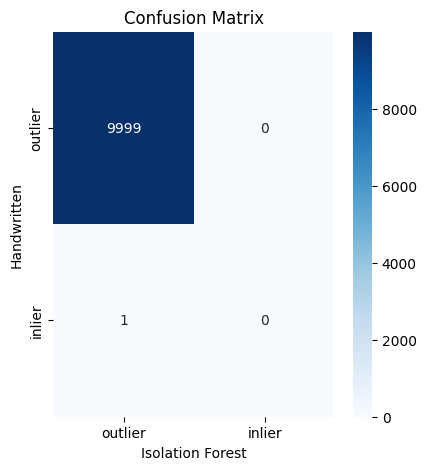

In [38]:
# Plot confusion matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["outlier","inlier"], yticklabels=["outlier","inlier"])
plt.title("Confusion Matrix")
plt.xlabel("Isolation Forest")
plt.ylabel("Handwritten")

In [39]:
#Both agree it is inlier
all_inlier = df2[(df2['is_inlier_IF'] == 1) & (df2['is_inlier_HW'] == 1)] 
all_inlier.to_csv("all_inlier.csv")

In [40]:
#Both agree it is outlier
all_outlier = df2[(df2['is_inlier_IF'] == -1) & (df2['is_inlier_HW'] == -1)] 
all_outlier.to_csv("all_outlier.csv")